# 6.6: Sourcing & Analyzing Time Series Data

### 1. Install Libraries and Data


In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'XPMEgu585Px8e_xsAQjz'

### 2. Find a data set to work and import it into your Jupyter notebook

In [4]:
# Importing London Bullion Market Association "Silver Price:London Fixing" variable.

data = quandl.get('LBMA/SILVER')

### 3. Make a subset of your data set if necessary

In [5]:
data.head()

,USD,GBP,EURO
Date,,,
1968-01-02,2.173,0.90417,NaN
1968-01-03,2.225,0.92500,NaN
1968-01-04,2.171,0.90208,NaN
1968-01-05,2.157,0.89583,NaN
1968-01-08,2.163,0.89792,NaN


In [6]:
data.shape

(13967, 3)

In [7]:
data.columns

Index(['USD', 'GBP', 'EURO'], dtype='object')

In [8]:
# Removing columns GBP and EURO as I am only interested in the US currency

data = data.drop(columns = ['GBP', 'EURO'])

### 4. Create a line chart of your data

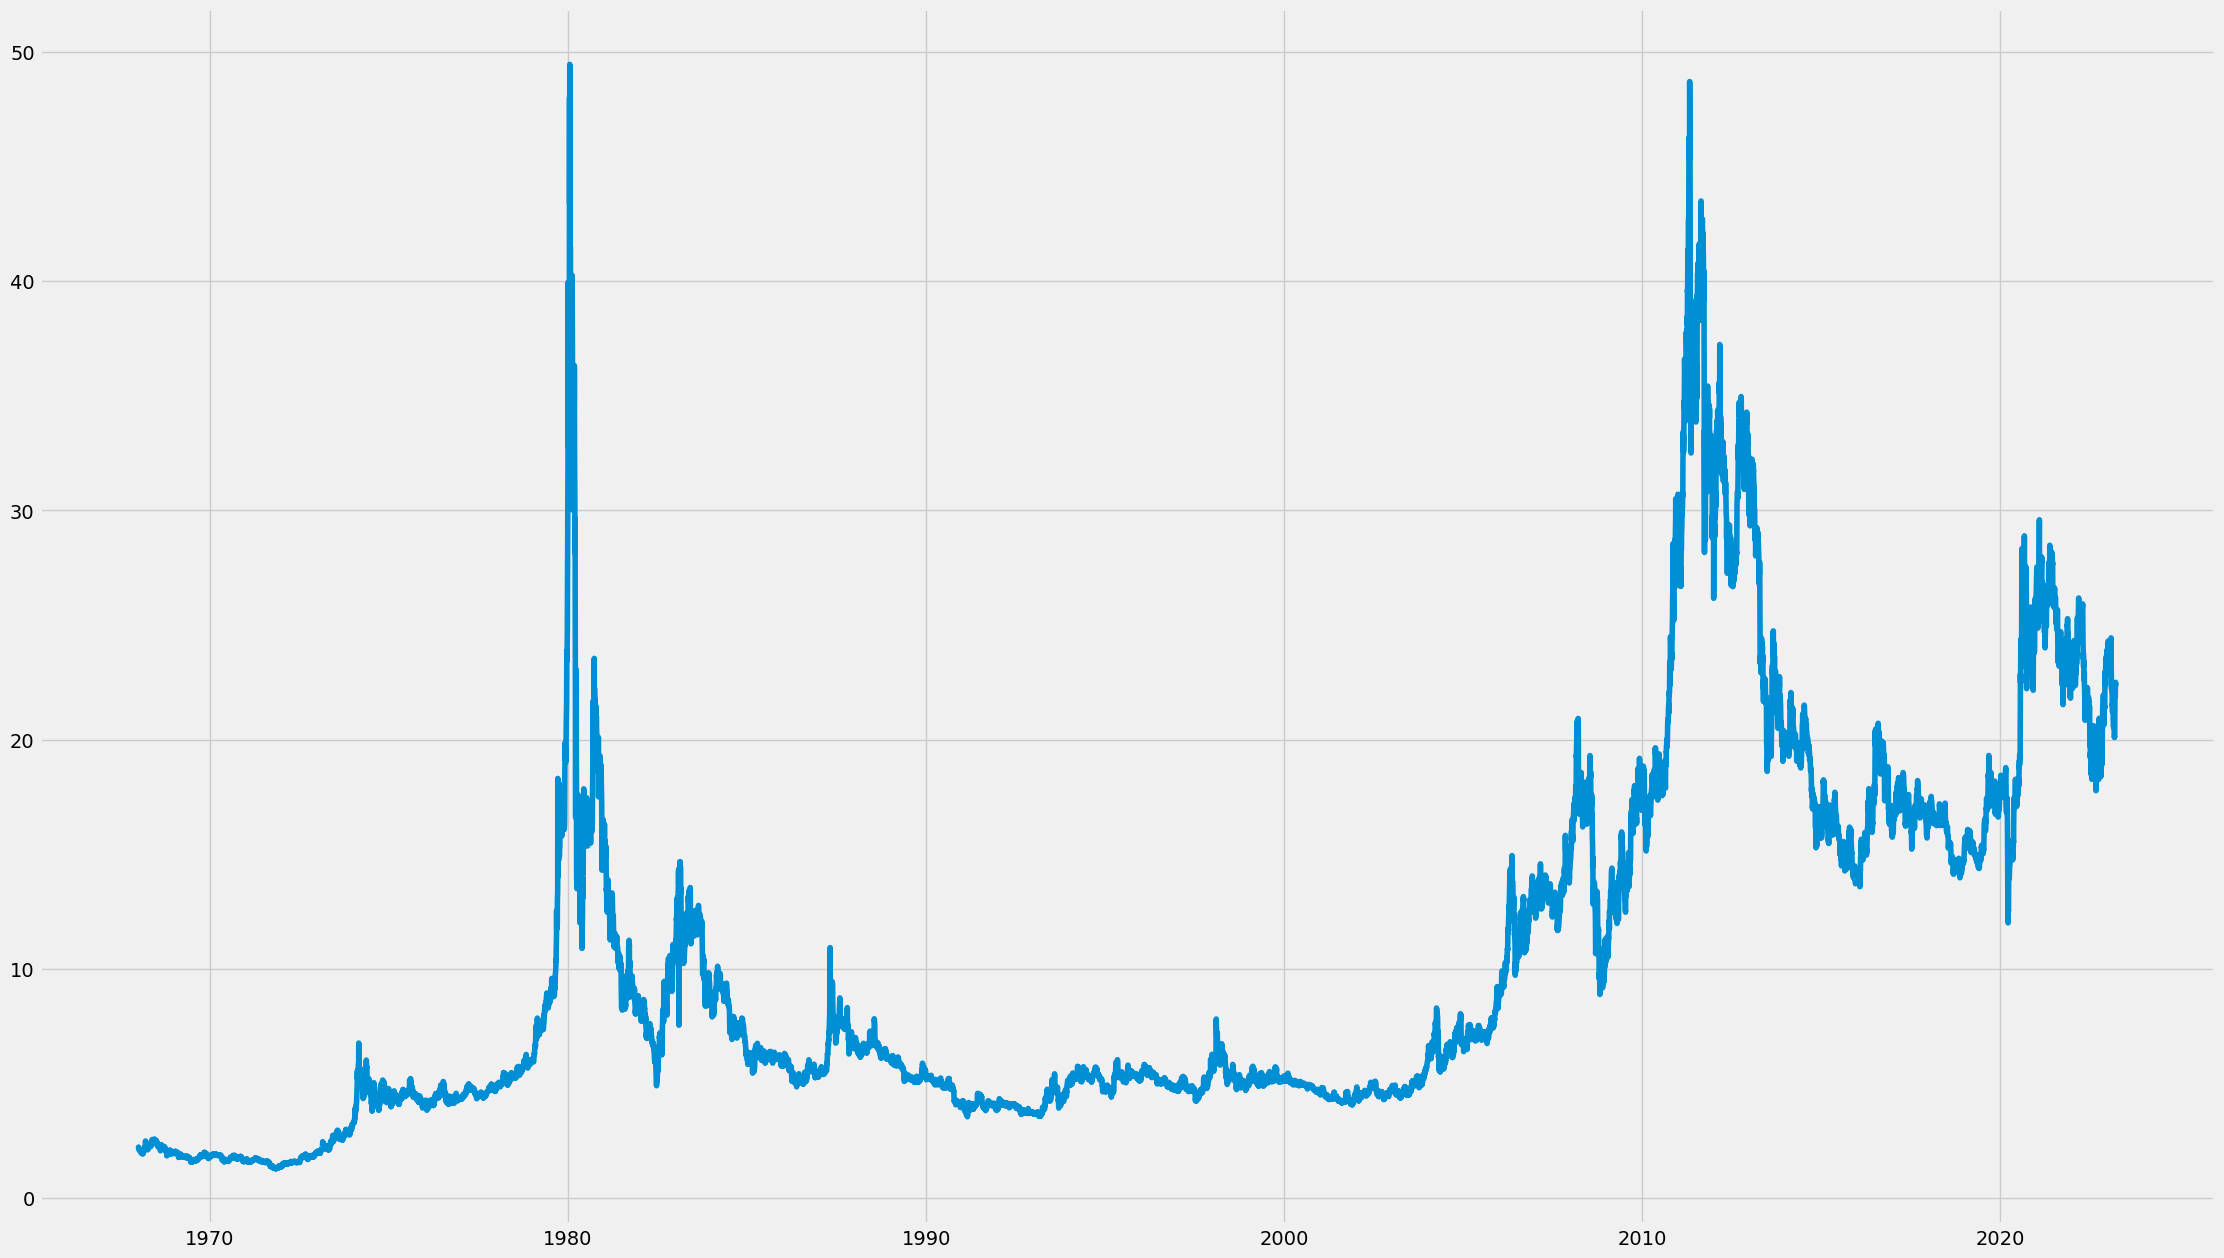

In [9]:
# Plot the data set

plt.figure(figsize=(25,15), dpi=100)
plt.plot(data)

In [10]:
# Check for missing values

data.isnull().sum()

USD    19
dtype: int64

In [12]:
df_nan = data[data['USD'].isnull() == True]

In [13]:
df_nan

,USD
Date,
1968-11-20,NaN
1968-11-21,NaN
1968-11-22,NaN
1971-08-16,NaN
1971-08-17,NaN
1971-08-18,NaN
1971-08-19,NaN
1971-08-20,NaN
1971-12-20,NaN


In [14]:
# I will remove data from before 1974
# Resetting index so that I can use the "Date" column as a filter

data_2 = data.reset_index()

In [15]:
df = data_2.loc[(data_2['Date'] >= '2000-01-01')]

In [16]:
df.head()

,Date,USD
8099,2000-01-04,5.3025
8100,2000-01-05,5.2850
8101,2000-01-06,5.1400
8102,2000-01-07,5.1350
8103,2000-01-10,5.1450


In [17]:
df.shape

(5868, 2)

In [18]:
# Set the "Date" column as the index

from datetime import datetime

df['new_date'] = df.Date.astype('str')
df['new_date'] = pd.to_datetime(df['new_date'])
df['Year'] = df['new_date'].dt.strftime('%Y')
df['month'] = pd.DatetimeIndex(df['new_date']).month

In [19]:
df['Year'] = df.Year.astype('str') + '-' + df.month.astype('str') + '-01'
df['Year'] = pd.to_datetime(df['Year'])
df = df[['Year', 'USD']]
df.head()

,Year,USD
8099,2000-01-01,5.3025
8100,2000-01-01,5.2850
8101,2000-01-01,5.1400
8102,2000-01-01,5.1350
8103,2000-01-01,5.1450


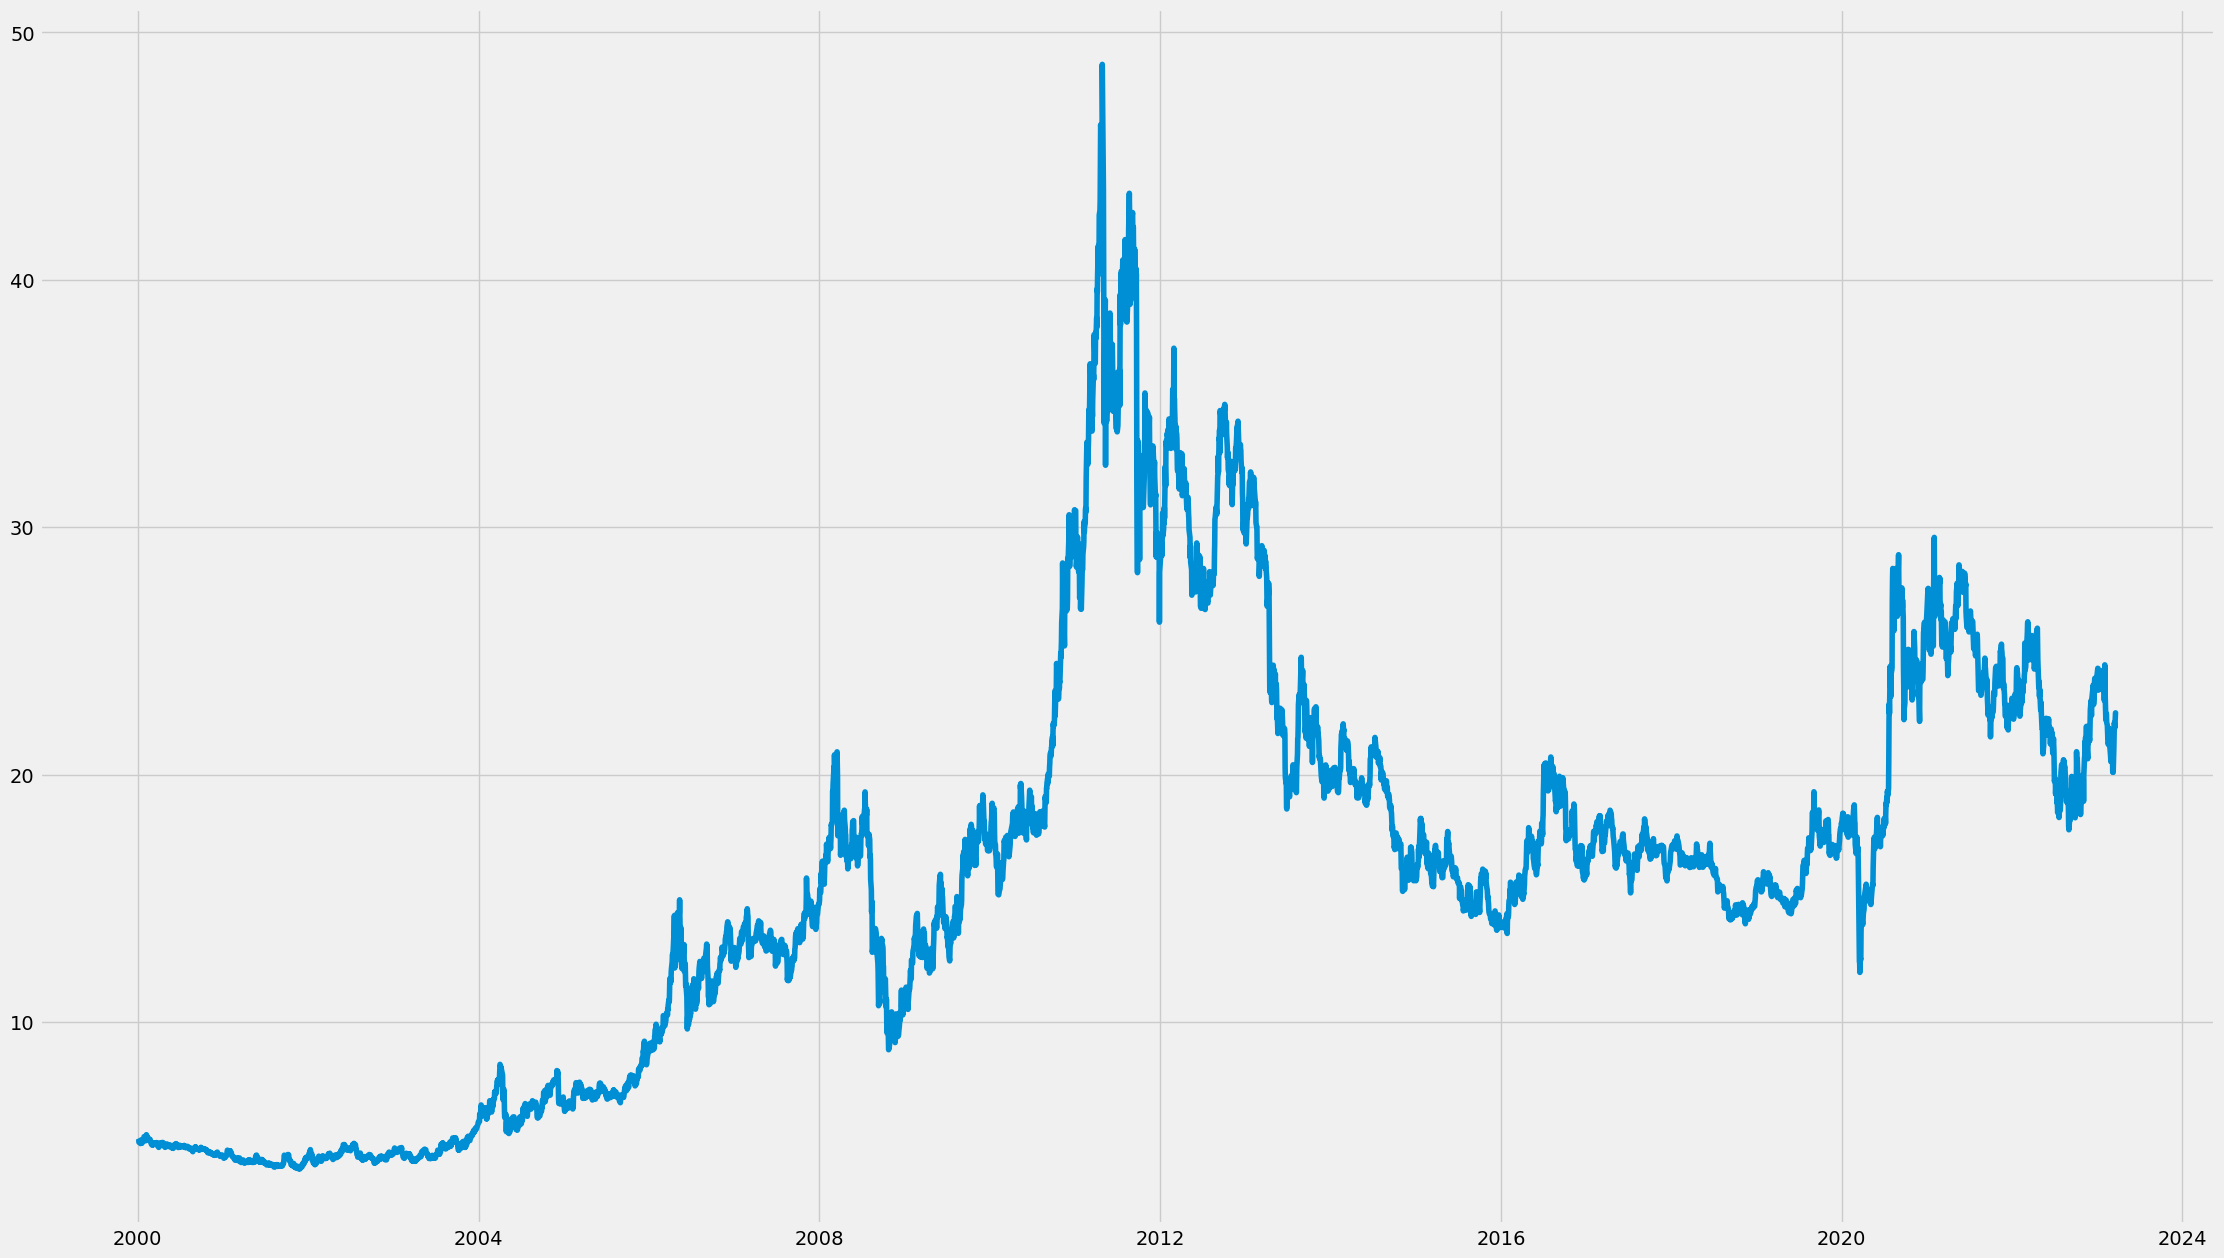

In [56]:
# Plot the new data set

plt.figure(figsize=(25,15), dpi=100)
plt.plot(df)

In [59]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None